# sklearn
Sklearn is one of the most used libraries when using **Machine Learning** algorithms. One of the most important things to know about **Machine Learning** is that its use is recommended for structured data, as it is can be found inside an excel table.

# Workflow
Sklearn has a large variety of algorithms, which are used for various purposes, so that it becomes almost impossible to touch everything at first glance, the best thing to do is to get an idea of the proper workflow. The flow is usually the following:

- Prepare the data (preprocessing).
- Choose the model.
- Model and make the prediction.
- Evaluate the model.
- Improve the model through experimentation.
- Save and use the model.

# Preprocessing

## Separating data
It is necessary to separate the data between dependent and independent variables for the supervised analysis, at the same time that it is necessary to obtain training and testing data, 80% for training and 20% for testing are recommended.

### Importing the dataset
A dataset on **heart-disease** will be used.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('heart-disease.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### Separating dependent and independent variables

#### Independents

In [ ]:
X = df.drop(['target'], axis=1)
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

#### Dependents

In [ ]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Separating the data into Train and Test
It is always very important to separate the data into train and test, train is used to train the model, while test is used to see the performance of the model.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Creating dummies
When having categorical data, it is necessary to transform it so that it is readable by the model.

### Importing the dataset
The dataset to be used will be **car-sales-extended**, which has categorical variables.

In [ ]:
!ls

car-sales-extended.csv		     gs_model1.pk1
car-sales-extended-missing-data.csv  gs_model2.joblib
car-sales-missing-data.csv	     heart-disease.csv


In [ ]:
df = pd.read_csv('car-sales-extended.csv')
df.head()

Make Colour  Odometer (KM)  Doors  Price
0   Honda  White          35431      4  15323
1     BMW   Blue         192714      5  19943
2   Honda  White          84714      4  28343
3  Toyota  White         154365      4  13434
4  Nissan   Blue         181577      3  14043

The categorical variables are **Make**, **Colour** and **Doors**, the latter is numeric but can be treated as a categorical variable.

### Separating the data
Once again it is necessary to obtain train and test values.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

### Importing the libraries

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import numpy as np

### Transforming categoricals
In order to have a better management **sklearn** the function **make_column_transformer** will be used and in order to obtain the variables **dummies** **OneHotEncoder** will be used.

In [ ]:
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', drop='first'), ['Make', 'Colour', 'Doors']),
    # passthrough has the purpose of taking all the data inside the variable X instead of the ones indicated in the list.
    remainder='passthrough'
    )
ct.fit(X_train)
X_train_dum = ct.transform(X_train)
X_test_dum = ct.transform(X_test)

#### `Drop="first"`

`drop="first"` is a parameter, which is recommended in case of using linear regression models, logistic regression and similar, since they have intercepts, at the same time it is a good idea when using regression models in deep learning since that it is good to reduce multicollinearity.

Using this parameter is intended to reduce the redundancy of variables and in turn reduce the number of variables.

In [ ]:
# Dummies.

np.set_printoptions(formatter={'float_kind':'{:0.1f}'.format})
X_train_dum[:5]

array([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 112004.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 35673.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 146824.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 45152.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 69954.0]])

In [ ]:
# Data original

X_train.head()

Make Colour  Odometer (KM)  Doors
29   Toyota  White         112004      4
535  Toyota  White          35673      4
695  Toyota  White         146824      4
557   Honda  Black          45152      4
836  Nissan   Blue          69954      4

### Panda Dummies
A simpler way to create dummies and understand what happened is using the pandas library, this is not recommended in production, because pandas has many limitations, one of the many is that when interpreting numeric values it does not touch them so that doors It remains the same.

In [ ]:
pd.get_dummies(X_train).head()

Odometer (KM)  Doors  Make_BMW  Make_Honda  Make_Nissan  Make_Toyota  \
29          112004      4         0           0            0            1   
535          35673      4         0           0            0            1   
695         146824      4         0           0            0            1   
557          45152      4         0           1            0            0   
836          69954      4         0           0            1            0   

     Colour_Black  Colour_Blue  Colour_Green  Colour_Red  Colour_White  
29              0            0             0           0             1  
535             0            0             0           0             1  
695             0            0             0           0             1  
557             1            0             0           0             0  
836             0            1             0           0             0

## Dealing with non-existent data

In [ ]:
!ls

car-sales-extended.csv		     gs_model1.pk1
car-sales-extended-missing-data.csv  gs_model2.joblib
car-sales-missing-data.csv	     heart-disease.csv


#### Importing the dataset
In this case, a dataset with certain missing data will be used.

In [ ]:
df = pd.read_csv('car-sales-extended-missing-data.csv')
df.head()

Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0

#### Verifying NA's

In [ ]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Operating on missing data
There are generally three operations, which can be performed on missing data **dropna**(to drop the data), **fillna**(to fill the data) and **interpolate**(to fill the data) .

##### Fillna
There are several ways to fill in the remaining data.

In [ ]:
# It is possible to fill the data with predisposed values.
df['Make'].fillna('missing', inplace=True)
df['Colour'].fillna('missing', inplace=True)
# It is possible to fill the data with the mean.
df['Odometer (KM)'].fillna(df['Odometer (KM)'].mean(), inplace=True)
df.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors            50
Price            50
dtype: int64

##### Interpolate

In [ ]:
df['Doors'].interpolate(method='linear', inplace=True)
df.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

##### Drop

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

#### Option with sklearn
There is an option to fill in missing data using sklearn

#### Importing the dataset
For this example a different dataset will be used.

In [ ]:
!ls

car-sales-extended.csv		     gs_model1.pk1
car-sales-extended-missing-data.csv  gs_model2.joblib
car-sales-missing-data.csv	     heart-disease.csv


In [ ]:
df_sk = pd.read_csv('car-sales-missing-data.csv')
df_sk

Make Colour  Odometer  Doors    Price
0  Toyota  White  150043.0    4.0   $4,000
1   Honda    Red   87899.0    4.0   $5,000
2  Toyota   Blue       NaN    3.0   $7,000
3     BMW  Black   11179.0    5.0  $22,000
4  Nissan  White  213095.0    4.0   $3,500
5  Toyota  Green       NaN    4.0   $4,500
6   Honda    NaN       NaN    4.0   $7,500
7   Honda   Blue       NaN    4.0      NaN
8  Toyota  White   60000.0    NaN      NaN
9     NaN  White   31600.0    4.0   $9,700

#### Checking for missing data

In [ ]:
df_sk.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

#### Filling data

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

caracteristics_I = SimpleImputer(strategy='constant', fill_value='missing')
doors_I = SimpleImputer(strategy='constant', fill_value=4)
odo_I = SimpleImputer(strategy='mean')

caracteristics_F = ['Make', 'Colour']
doors_F = ['Doors']
odo_F = ['Odometer']

col = make_column_transformer(
        (caracteristics_I, caracteristics_F),
        (doors_I, doors_F),
        (odo_I, odo_F)
      )

col.fit_transform(df_sk)

array([['Toyota', 'White', 4.0, 150043.0],
       ['Honda', 'Red', 4.0, 87899.0],
       ['Toyota', 'Blue', 3.0, 92302.66666666667],
       ['BMW', 'Black', 5.0, 11179.0],
       ['Nissan', 'White', 4.0, 213095.0],
       ['Toyota', 'Green', 4.0, 92302.66666666667],
       ['Honda', 'missing', 4.0, 92302.66666666667],
       ['Honda', 'Blue', 4.0, 92302.66666666667],
       ['Toyota', 'White', 4.0, 60000.0],
       ['missing', 'White', 4.0, 31600.0]], dtype=object)

## Dealing with outliers
The **outliers** are data that are at the very far ends, therefore they can be considered as noise and are not helpful for a model, since they can alter its fit. It is possible to find outliers in a histogram.

The previous dataset will be used.

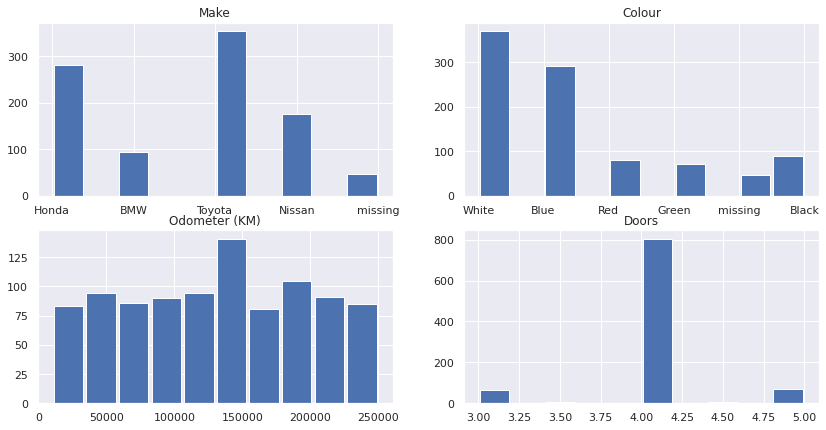

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,7))
ax[0][0].hist(df['Make'], rwidth=0.9)
ax[0][0].title.set_text('Make')
ax[0][1].hist(df['Colour'], rwidth=0.9)
ax[0][1].title.set_text('Colour')
ax[1][0].hist(df['Odometer (KM)'], rwidth=0.9)
ax[1][0].title.set_text('Odometer (KM)')
ax[1][1].hist(df['Doors'], rwidth=0.9)
ax[1][1].title.set_text('Doors')

plt.show()

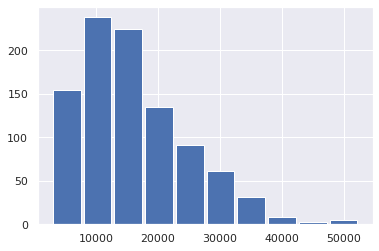

In [ ]:
plt.hist(df['Price'], rwidth=0.9)
plt.show()

### Removing outliers
The best way to remove outliers is by removing 1% or 2% of the data from the side where the outliers are, in this case the 1% of the upper part of the variable **"Price" will be removed (the variable that has outliers)** but there are times where the bottom part or both parts are required.

#### Observing the size of the data

In [ ]:
df.shape

(950, 5)

#### Removing outliers

In [ ]:
# El quantile 99 da el 99% de la data.

q = df['Price'].quantile(0.99)

df = df[df['Price'] < q]
df.shape

(940, 5)

#### Checking the data

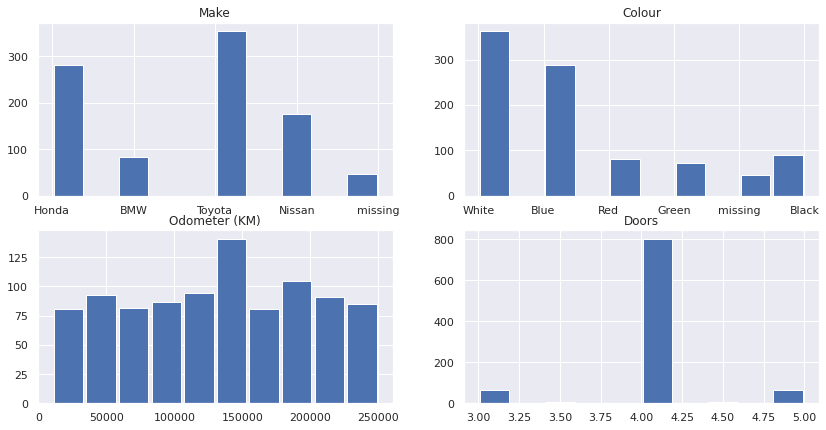

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,7))
ax[0][0].hist(df['Make'], rwidth=0.9)
ax[0][0].title.set_text('Make')
ax[0][1].hist(df['Colour'], rwidth=0.9)
ax[0][1].title.set_text('Colour')
ax[1][0].hist(df['Odometer (KM)'], rwidth=0.9)
ax[1][0].title.set_text('Odometer (KM)')
ax[1][1].hist(df['Doors'], rwidth=0.9)
ax[1][1].title.set_text('Doors')

plt.show()

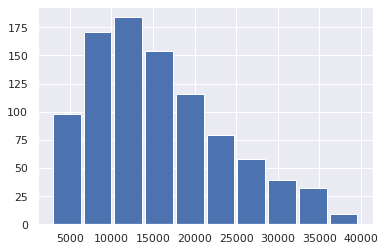

In [ ]:
plt.hist(df['Price'], rwidth=0.9)
plt.show()

## Scaling
Scaling data is one of the most important things when dealing with a wide variety of **Machine learning** and **Deep learning** algorithms, in some cases it can produce small changes in the results but in others it produces very large changes. , especially when it comes to algorithms that have as a component the analysis of distances between the data.

As an example, if you have 5kg and 5000mg, obviously the second will have a much greater weight, altering the result, so it is advisable to scale the data.

Something important is to scale the data in the great majority of cases, even when it is not about algorithms that are made up of distance analysis.

### Scaling with sklearn
Sklearn has a series of algorithms to scale the data, the most commonly used are 4:
- StandardScaler.
- MinMaxScaler.
- RobustScaler.
- Normalizer.

##### StandardScaler
This scaler assumes that the data has a normal form, its basic operation is to convert the data into **z** values using the following formula:

$$z = \frac{xi - mean(x)}{std(x)}$$

#### MinMaxScaler
This scaler converts data into ranges from 0 to 1, this is one of the most popular scalers and one that is used by default for **deep learning**, it works very well in two cases:

- When the distribution is not normal.
- When the standard deviation is very small.

This scaler has the following formula:

$$\frac{xi-min(x)}{max(x)-min(x)}$$

One of the problems with this scaler is that it is very sensitive to outliers.

#### RobustScaler
It is similar to MinMaxScaler but instead of min and max it uses the interquartile range so that it becomes robust to the outliers, it uses the following formula:

$$\frac{xi-Q1(x)}{Q3(x)-Q4(x)}$$

#### Normalizer
Scale the data according to its location point within the Cartesian plane, it uses the following formula:

$$\frac{xi}{\sqrt{x^2+y^2+z^2}}$$

# Choosing the right model
Sklearn has a great diversity of data, which in turn have various purposes, regression, classification, etc. Fortunately sklearn has a proposal **for beginners** in the following [link](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) where you can find a map.

## Regression

### Importing dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

### Generating DataFrame

In [ ]:
df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

### Generating Targets

In [ ]:
df['Target'] = housing['target']
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

### Generating dependent and independent variables

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']
X.shape, y.shape

((20640, 8), (20640,))

### Separating train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

### Doing Ridge regression
As sklearn's advice and according to the dimensions of the data it is possible to initially experiment with **ridge regression**. In this case, the regression will be done in a simple way, so it is not a good idea to run the model in this same way in production.

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.6125511245209703, 0.5758549611440126)

### Doing Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.29040715589885424, 0.2841671821008396)

### Making RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9736840686191602, 0.803486312021205)

#### Making predictions
It is possible to make predictions using **RandomForest**.

In [ ]:
model.predict(X_test[0:10])

array([0.5, 0.7, 4.9, 2.6, 2.3, 1.6, 2.4, 1.7, 2.6, 4.9])

In [ ]:
y_test[:10]

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
13311    1.58700
7113     1.98200
7668     1.57500
18246    3.40000
5723     4.46600
Name: Target, dtype: float64

## Classification

### Importing dataset

In [ ]:
!ls

car-sales-extended.csv		     gs_model1.pk1
car-sales-extended-missing-data.csv  gs_model2.joblib
car-sales-missing-data.csv	     heart-disease.csv


In [ ]:
data = pd.read_csv('heart-disease.csv')
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [ ]:
data.shape

(303, 14)

### Extra preprocessing
When it comes to classification models it is necessary to do some extra preprocessing.

The samples are not always balanced, so before applying a classification model it is necessary to balance the samples.

In [ ]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
165/303, 138/303

(0.5445544554455446, 0.45544554455445546)

#### One
It is possible to reduce the imbalance by removing a percentage of the largest, in this case 95% of those that have **"target"** equal to 1.

In [ ]:
data_one = data[data['target'] == 1].head(int(165*0.95))
data_one

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
151   71    0   0       112   149    0        1      125      0      1.6   
152   64    1   3       170   227    0        0      155      0      0.6   
153   66    0   2       146   278    0        0      152      0      0.0   
154   39    0   2       138   220    0        1      152      0      0.0   
155   58    0   0       130   197    0        1      131      0      0.6   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
151      1   0     2       1  
152      1   0     3       1  
153      1   1     2       1  
154      1   0     2       1  
155      1   0     2       1  

[156 rows x 14 columns]

#### zero

In [ ]:
data_zero = data[data['target'] == 0]
data_zero

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
165   67    1   0       160   286    0        0      108      1      1.5   
166   67    1   0       120   229    0        0      129      1      2.6   
167   62    0   0       140   268    0        0      160      0      3.6   
168   63    1   0       130   254    0        0      147      0      1.4   
169   53    1   0       140   203    1        0      155      1      3.1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
165      1   3     2       0  
166      1   2     3       0  
167      0   2     2       0  
168      1   1     3       0  
169      0   0     3       0  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[138 rows x 14 columns]

#### Joining both

In [ ]:
data = data_one.append(data_zero)
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[294 rows x 14 columns]

#### Restarting the index
After the operation carried out, the past indexes remained as they were at the beginning, so you have to restart them so that they are updated.

In [ ]:
data.reset_index(inplace=True)
data

index  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0        0   63    1   3       145   233    1        0      150      0   
1        1   37    1   2       130   250    0        1      187      0   
2        2   41    0   1       130   204    0        0      172      0   
3        3   56    1   1       120   236    0        1      178      0   
4        4   57    0   0       120   354    0        1      163      1   
..     ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
289    298   57    0   0       140   241    0        1      123      1   
290    299   45    1   3       110   264    0        1      132      0   
291    300   68    1   0       144   193    1        1      141      0   
292    301   57    1   0       130   131    0        1      115      1   
293    302   57    0   1       130   236    0        0      174      0   

     oldpeak  slope  ca  thal  target  
0        2.3      0   0     1       1  
1        3.5      0   0     2       1  
2        1.4      2   0     2       1  
3        0.8      2   0     2       1  
4        0.6      2   0     2       1  
..       ...    ...  ..   ...     ...  
289      0.2      1   0     3       0  
290      1.2      1   0     3       0  
291      3.4      1   2     3       0  
292      1.2      1   1     3       0  
293      0.0      1   1     2       0  

[294 rows x 15 columns]

#### Shuffling the data

In [ ]:
data_shuffle = data.sample(frac=1)
data_shuffle

index  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
115    115   37    0   2       120   215    0        1      170      0   
104    104   50    1   2       129   196    0        1      163      0   
118    118   46    0   1       105   204    0        1      172      0   
111    111   57    1   2       150   126    1        1      173      0   
292    301   57    1   0       130   131    0        1      115      1   
..     ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
127    127   67    0   2       152   277    0        1      172      0   
202    211   61    1   0       120   260    0        1      140      1   
0        0   63    1   3       145   233    1        0      150      0   
96      96   62    0   0       140   394    0        0      157      0   
20      20   59    1   0       135   234    0        1      161      0   

     oldpeak  slope  ca  thal  target  
115      0.0      2   0     2       1  
104      0.0      2   0     2       1  
118      0.0      2   0     2       1  
111      0.2      2   1     3       1  
292      1.2      1   1     3       0  
..       ...    ...  ..   ...     ...  
127      0.0      2   1     2       1  
202      3.6      1   1     3       0  
0        2.3      0   0     1       1  
96       1.2      1   0     2       1  
20       0.5      1   0     3       1  

[294 rows x 15 columns]

#### Restarting the index
Once again the indexes were altered so that it is necessary to restart them.

In [ ]:
data_shuffle.reset_index(inplace=True)
data_shuffle

level_0  index  age  sex  cp  trestbps  chol  fbs  restecg  thalach  \
0        115    115   37    0   2       120   215    0        1      170   
1        104    104   50    1   2       129   196    0        1      163   
2        118    118   46    0   1       105   204    0        1      172   
3        111    111   57    1   2       150   126    1        1      173   
4        292    301   57    1   0       130   131    0        1      115   
..       ...    ...  ...  ...  ..       ...   ...  ...      ...      ...   
289      127    127   67    0   2       152   277    0        1      172   
290      202    211   61    1   0       120   260    0        1      140   
291        0      0   63    1   3       145   233    1        0      150   
292       96     96   62    0   0       140   394    0        0      157   
293       20     20   59    1   0       135   234    0        1      161   

     exang  oldpeak  slope  ca  thal  target  
0        0      0.0      2   0     2       1  
1        0      0.0      2   0     2       1  
2        0      0.0      2   0     2       1  
3        0      0.2      2   1     3       1  
4        1      1.2      1   1     3       0  
..     ...      ...    ...  ..   ...     ...  
289      0      0.0      2   1     2       1  
290      1      3.6      1   1     3       0  
291      0      2.3      0   0     1       1  
292      0      1.2      1   0     2       1  
293      0      0.5      1   0     3       1  

[294 rows x 16 columns]

In [ ]:
counts = data_shuffle['target'].value_counts()
counts

1    156
0    138
Name: target, dtype: int64

In [ ]:
counts[0]/len(data_shuffle), counts[1]/len(data_shuffle)

(0.46938775510204084, 0.5306122448979592)

### Generating dependent and independent variables

In [ ]:
X = data_shuffle.drop('target', axis=1)
y = data_shuffle['target']
X.head()

level_0  index  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0      115    115   37    0   2       120   215    0        1      170      0   
1      104    104   50    1   2       129   196    0        1      163      0   
2      118    118   46    0   1       105   204    0        1      172      0   
3      111    111   57    1   2       150   126    1        1      173      0   
4      292    301   57    1   0       130   131    0        1      115      1   

   oldpeak  slope  ca  thal  
0      0.0      2   0     2  
1      0.0      2   0     2  
2      0.0      2   0     2  
3      0.2      2   1     3  
4      1.2      1   1     3

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: target, dtype: int64

### Separating train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((235, 15), (59, 15), (235,), (59,))

### Making SVC

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC(max_iter=1000000)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 1.0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 1.0)

## Recommendation
Once the examples have been seen, the recommendation to choose the appropriate model is to do a pre-processing and adjust the models in their basic form, and then, once the appropriate model has been chosen, do it in production, making said model more robust by adjusting its characteristics. , in the case of structured data the RandomForest model is recommended **for beginners**, while for unstructured data a deep learning model is recommended.

# Modeling and making predictions

## Modeling
In this case the basic model of **RandomForestClassifier** made previously will be used.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 1.0)

## Predictions
There are two ways to make predictions, these are:

- predict().
- predict_test().

### Predict

In [ ]:
clf.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
np.array(y_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

#### Comparing values

In [ ]:
clf.predict(X_test) == np.array(y_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

### Predict_test
`predict_proba()` indicates the probability that it is one value or another, it returns a series of lists of the form:

```
[[probability of not being, probability of being]]
```

In [ ]:
clf.predict_proba(X_test[:10])

array([[0.0, 1.0],
       [1.0, 0.0],
       [0.0, 1.0],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.0, 1.0],
       [0.0, 1.0],
       [0.1, 0.9],
       [1.0, 0.0],
       [1.0, 0.0]])

# Evaluating the model
Something that was done before was to evaluate the models previously created with `score()` this is one way to evaluate the models, but there are other ways.

## Evaluating with score
`score()` is a common method in the models offered by **"sklearn"** this method rates the performance of a model from 0 to 1 with 1 being the best performance and 0 being the worst.

### Evaluating regressions
In order to evaluate regressions, the `score()` method usually evaluates distances between the created model and the real data.

### Evaluating classification
To evaluate ratings the `score()` method evaluates the percentage of hits of the model, contrasting the predicted values and the actual values.

## Evaluating with cross-validation
One of the problems when doing validation with train - test is that only two random samples are taken for train and for test, which can be favorable due to chance, so it is better to take several samples to reduce bias in the tests.

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=10)

array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

Here the 1/cv is taken for test so that if:

$$cv = 5$$

So...

$$1/5 = 0.2 = 20\%$$

In this way, 20% of the sample would be taken for testing, the same if it were 10, 20 or 30.

This will use the same scoring method that the model has to perform its scores.

In turn, the model shows the following data:

```
array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
```

Here we can see that the model created has 100% correct answers, but in general for any model there are two important things, first, if there is a lot of variation in the results, the model is not correct since it does not fit the data well, only some cases, the second thing is that it is possible to obtain the average of the results to know how the model performs but none of this is useful if the first condition is not met, if the model has very different results it is necessary to reconsider it.

In [ ]:
np.mean(cross_val_score(clf, X, y, cv=10))

1.0

The mean of hits is 100%. **according to cross-validation**. This technique is called as **Cross-validation Accuracy**

## Other evaluation methods for both regression and classification models

### Methods for classification models
- Accuracy.
- ROC-AUC.
- Confusion matrix.
- Classification report.

#### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))

1.0

#### Confusion matrix
The purpose of the confusion matrix is to contrast the values of successes and errors of the model.

In [ ]:
from tabulate import tabulate
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, clf.predict(X_test))
matrix

array([[23,  0],
       [ 0, 36]])

In [ ]:
print(tabulate(matrix, tablefmt='fancy_grid', headers=[0, 1], showindex=[0,1]))

╒════╤═════╤═════╕
│    │   0 │   1 │
╞════╪═════╪═════╡
│  0 │  23 │   0 │
├────┼─────┼─────┤
│  1 │   0 │  36 │
╘════╧═════╧═════╛


According to the confusion matrix, 29 matches 0 and 0, and 30 matches 1 and 1.

##### Graphing matrix

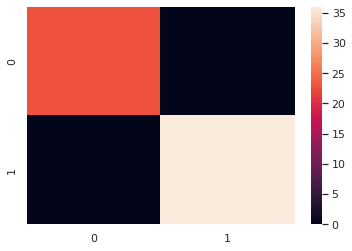

In [ ]:
import seaborn as sns

sns.heatmap(matrix)
plt.show()

##### Graphing with sklearn

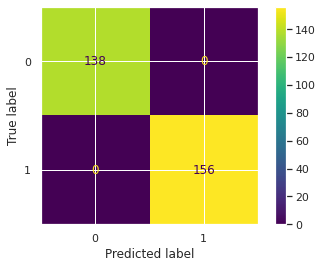

In [ ]:
# Graphing with the estimators.

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X= X, y=y)

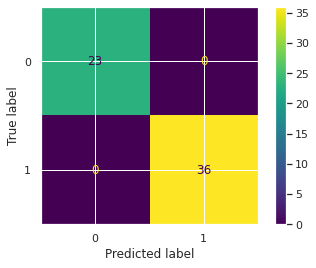

In [ ]:
# From the predictions.

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=clf.predict(X_test))

#### ROC
ROC is a curve that shows the performance of the model between the TPR and FPR, at different thresholds.

- TPR(True positive rate) is the ratio of true positives, it has the following formula:

$$TPR = \frac{TP}{TP + FN}$$

- FPR(False positive rate) is the false positive rate, it has the following formula:

$$FPR = \frac{FP}{FP -TN}$$

- The thresholds or thresholds are the points at which it determines if the result of a data is 1 or 0, the most common threshold is 50% so that if the probability of success is 51% the final result is 1 if it were of 49% the result would be 0.

##### Getting predict_test
In order to use the ROC curve it is necessary to use the second data within `predict_proba()`, which is the probability of success.

In [ ]:
from sklearn.metrics import roc_curve

y_pred = clf.predict_proba(X_test)
y_pred[:5]

array([[0.0, 1.0],
       [1.0, 0.0],
       [0.0, 1.0],
       [0.1, 0.9],
       [0.1, 0.9]])

##### Getting the odds of success

In [ ]:
y_pred_true = y_pred[: , 1]
y_pred_true

array([1.0, 0.0, 1.0, 0.9, 0.9, 1.0, 1.0, 0.9, 0.0, 0.0, 1.0, 1.0, 0.0,
       1.0, 0.1, 1.0, 0.0, 0.9, 0.9, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,
       0.1, 1.0, 0.8, 0.0, 0.9, 1.0, 0.0, 1.0, 0.0, 0.9, 0.0, 1.0, 0.9,
       1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.1, 0.9, 0.0, 0.0, 0.1, 1.0, 1.0,
       1.0, 1.0, 0.0, 1.0, 1.0, 0.9, 0.1])

In [ ]:
fpr, tpr, threshols = roc_curve(y_test, y_pred_true)
fpr, tpr, threshols

(array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.3, 0.5, 0.6,
        0.7, 1.0]),
 array([0.0, 0.1, 0.2, 0.4, 0.7, 0.8, 0.8, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0,
        1.0, 1.0]),
 array([2.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.9, 0.9, 0.8, 0.1, 0.0, 0.0, 0.0,
        0.0, 0.0]))

##### Graphing ROC curve

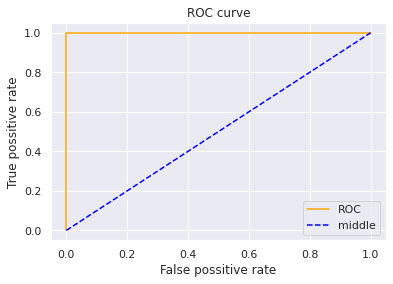

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(fpr, tpr, color='orange', label='ROC')
ax.plot([0, 1], [0, 1], color='blue', linestyle='--', label='middle')
plt.xlabel('False possitive rate')
plt.ylabel('True possitive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

#### AUC
AUC is better known as **"area under the curve"** this is the integral of the area under the ROC curve, the highest AUC value is 1.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_true)

1.0

##### Recommendation
One extremely important thing about the ROC-AUC curve is that it works only for binary models.

#### Classification report
Classification report returns a series of metrics to be able to evaluate the performance of the model, these are:

 Score| Metricas empleadas
 --- | ---
 Precision | The ratio of true positives to false positives.
 Recall | The ratio of true positives to false negatives.
 F1-score | This is the combination of "Precision and "Recall".
 Support | This is the amount of data evaluated.
 Accuracy | Este es el calculo del "ACCURACY" o datos acertados.

**Precision** and **Recall** are the two most commonly used metrics for unbalanced samples, such as when there is more than 0 than 1.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        36

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



#### Cross validation
Cross validation has a parameter which is called `scoring`, it receives a metric method, to which the cross validation conforms:

```
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")

np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.2f}")
```

### Methods for regression models
There are 3 methods that are the most common for regression models, these are:

- R2.- Evaluate how well the model fits the data.
- MAE.- Evaluates the mean of absolute differences between the real data and the predicted data. This gives a metric of how wrong the model is.
- MSE.- Evaluates the mean squared differences between the real data and the predicted data, this metric is how wrong the model is but punishing the outliers in a way.
- MSLE.- It is a variation of **MSE** that uses logarithms, this is a viable option when the results are very long, and in this case it penalizes more when the real values are greater than the predicted ones than when the predicted values are greater than the real ones.

#### R2

There are two ways to calculate R2, the first is using the `score()` method of the model used:

```
model.score(X_test, y_test)
```
And the second is using the `r2_score()` method:

```
from sklearn.metrics import r2_score
r2_score(y_test, y_test_mean)
```

Both calculate values between 0 and 1, with 0 being the worst and 1 being the best.

#### MAE

This metric can be calculated as follows:

```
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mother
```
#### MSE

This metric can be calculated as follows:

```
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse
```

#### Cross validation

In the same way as with the classification models, it is possible to adjust the `scoring` method to the regression metrics:

```
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")

np.random.seed(42)
cv_mse = cross_val_score(model, X, y cv=5, scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")
```

# Improving the model through experimentation
When improving a model it is necessary to think from two perspectives, the first from the data and the second from the model.

### From date
- If possible **Get more data (more data is usually always better)**.
- If the data can be improved.

### From model
- If it is possible to use a better model.
- If the current model can be improved.

## Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Parameters

Something important in the models is that they receive parameters, which can be adjusted to improve the model, there are 3 ways to do it:

- By hand.
- Random using RandomSearchCV.
- Exhaustively using GridSearchCV.

Something important is to know the model to use since it is necessary to know what each parameter does, for the example the following parameters of **RandomForest** will be used:

-max_depth.
-max_features.
-min_samples_leaf.
-min_samples_split.
-n_estimators.

Finally, this part is where the validation data enters, so here we separate the data into 3 parts:

-Train.
- Test.
- Validation.

The recommended is 70% for Train, 15% for Test and 15% for validation.

## Re - making the model
It is necessary to make the model again and separate the data to obtain the three groups.

In [ ]:
!ls

car-sales-extended.csv		     gs_model1.pk1
car-sales-extended-missing-data.csv  gs_model2.joblib
car-sales-missing-data.csv	     heart-disease.csv


### Extracting the data

In [ ]:
df = pd.read_csv('heart-disease.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### Moving data randomly

In [ ]:
np.random.seed(42)

df = df.sample(frac=1)

### Obtaining the dependent and independent variables

In [ ]:
X = df.drop('target', axis=1)
y = df['target']
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
111   57    1   2       150   126    1        1      173      0      0.2   
246   56    0   0       134   409    0        0      150      1      1.9   
60    71    0   2       110   265    1        0      130      0      0.0   

     slope  ca  thal  
179      1   1     1  
228      1   0     3  
111      2   1     3  
246      1   2     3  
60       2   1     2

In [ ]:
y.head()

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

### Getting the groups

#### Getting Train and test

In [ ]:
Train_size = int(len(X)*0.7)

X_train = X[:Train_size]
y_train = y[:Train_size]

X_test = X[Train_size:]
y_test = y[Train_size:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((212, 13), (212,), (91, 13), (91,))

#### Getting validation

In [ ]:
Test_size = int(len(X_test) * 0.5)

X_test = X_test[Test_size:]
y_test = y_test[Test_size:]

X_val = X_test[:Test_size]
y_val = y_test[:Test_size]

X_test.shape, y_test.shape, X_val.shape, y_val.shape

((46, 13), (46,), (45, 13), (45,))

### Adjusting manually

#### Funcion para calificacion del modelo

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

#### Making first model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

hand1 = evaluate_preds(y_val, y_pred)
hand1

Acc: 80.00%
Precision: 0.83
Recall: 0.79
F1 score: 0.81


{'accuracy': 0.8, 'f1': 0.81, 'precision': 0.83, 'recall': 0.79}

#### Making second model

In [ ]:
clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_val)

hand2 = evaluate_preds(y_val, y_pred)
hand2

Acc: 82.22%
Precision: 0.86
Recall: 0.79
F1 score: 0.83


{'accuracy': 0.82, 'f1': 0.83, 'precision': 0.86, 'recall': 0.79}

#### Making third model

In [ ]:
clf3 = RandomForestClassifier(n_estimators=100, max_depth=20)
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_val)

hand3 = evaluate_preds(y_val, y_pred)
hand3

Acc: 80.00%
Precision: 0.83
Recall: 0.79
F1 score: 0.81


{'accuracy': 0.8, 'f1': 0.81, 'precision': 0.83, 'recall': 0.79}

#### Conclusion
Without a doubt, the second model was the best due to the two adaptations that were made, but everything is trial and error.

### Tuning with RandomizedSearchCV

#### Creating the model and fitting it

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ['auto', 'sqrt'],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(
    # Estimator model.
    estimator= clf,
    # Los parametros a emplear.
    param_distributions= grid,
    # Number of combinations to use of the established parameters.
    n_iter= 10,
    # Cross-validation.
    cv= 5,
    # To have a more visual result.
    verbose= 2
)

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

#### n_iter
The parameter **n_iter** is the number of combinations that the model will make, this can be calculated as follows.

In [ ]:
n_estimators= 6 #[10, 100, 200, 500, 1000, 1200]
max_depth= 5 #[None, 5, 10, 20, 30]
max_features= 2 #['auto', 'sqrt']
min_samples_split= 3 #[2, 4, 6]
min_samples_leaf= 3 #[1, 2, 4]
cv = 5

n_estimators * max_depth * max_features * min_samples_split * min_samples_leaf * cv

2700

The result is very large so it would take a long time to run it, it is because of this that **RandomizedSearchCV** is used since here a number of iterations can be set.

#### Reviewing the information of the best model

Using the best_params_ attribute, the parameters of the best model can be obtained.

In [ ]:
rs_clf.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

#### Evaluating the model

The model is evaluated with the function created previously to evaluate manual models.

In [ ]:
rs_y_pred = rs_clf.predict(X_val)

rs_ev = evaluate_preds(y_val, rs_y_pred)
rs_ev

Acc: 82.22%
Precision: 0.83
Recall: 0.83
F1 score: 0.83


{'accuracy': 0.82, 'f1': 0.83, 'precision': 0.83, 'recall': 0.83}

### Tuning with GridSearchCV

#### Modifying grid
For the example, a much smaller grid will be used, because the real size should be very large and also **GridSearchCV** does all the iterations it should do.

In [ ]:
grid

{'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [10, 100, 200, 500, 1000, 1200]}

In [ ]:
max_depth= 1 #[None]
max_features= 2 #['auto', 'sqrt']
min_samples_leaf= 2 #[1, 2]
min_samples_split= 1 #[6]
n_estimators= 3 #[100, 200, 500]}
cv= 5

n_estimators * max_depth * max_features * min_samples_split * min_samples_leaf * cv

60

In [ ]:
grid2 = {'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [6],
 'n_estimators': [100, 200, 500]}

#### Creating the model and fitting it

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid2,
                      cv=5,
                      verbose=2)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

#### Reviewing the information of the best model

In [ ]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

#### Evaluating the model

In [ ]:
gs_y_preds = gs_clf.predict(X_val)
gs_ev = evaluate_preds(y_val, gs_y_preds)
gs_ev

Acc: 82.22%
Precision: 0.83
Recall: 0.83
F1 score: 0.83


{'accuracy': 0.82, 'f1': 0.83, 'precision': 0.83, 'recall': 0.83}

### Reviewing the performance of the created models

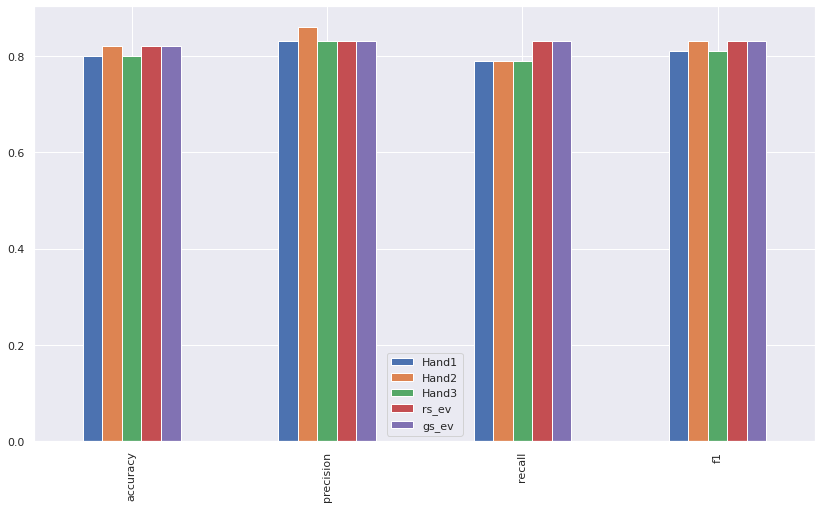

In [ ]:
import seaborn as sns

sns.set()

compare = pd.DataFrame({'Hand1': hand1,
                        'Hand2': hand2,
                        'Hand3': hand3,
                        'rs_ev': rs_ev,
                        'gs_ev': gs_ev})
compare.plot.bar(figsize=(14,8))
plt.show()

# Saving and loading the model

Once the model is finished, it is possible to save it externally to be able to use it and take it to production. There are many ways to perform this operation, but this time two modules will be used:

- pickle.
-joblib.

## Using pickle

### Saving model

In [ ]:
import pickle
pickle.dump(gs_clf, open('gs_model1.pk1', 'wb'))

### Loading the model

In [ ]:
loaded_model = pickle.load(open('gs_model1.pk1', 'rb'))

### Evaluating model
It is possible to evaluate the model with the same function done before.

In [ ]:
pickle_y_preds = loaded_model.predict(X_val)
evaluate_preds(y_val, pickle_y_preds)

Acc: 82.22%
Precision: 0.83
Recall: 0.83
F1 score: 0.83


{'accuracy': 0.82, 'f1': 0.83, 'precision': 0.83, 'recall': 0.83}

## Using joblib

### Saving model

In [ ]:
from joblib import dump, load

dump(gs_clf, filename='gs_model2.joblib')

['gs_model2.joblib']

In [ ]:
joblib_model = load(filename='gs_model2.joblib')

### Evaluating model

In [ ]:
joblib_y_pred = joblib_model.predict(X_val)
evaluate_preds(y_val, joblib_y_pred)

Acc: 82.22%
Precision: 0.83
Recall: 0.83
F1 score: 0.83


{'accuracy': 0.82, 'f1': 0.83, 'precision': 0.83, 'recall': 0.83}

Up to this point the entire workflow was seen in sklearn for machine learning models, perhaps there have been times when the results were different using the same datasets, this is due to the preprocessing which was different in some cases, but this was Just to demonstrate the workflow.

# Extra
Something not touched yet and very useful is the **Pipeline** class, as an extra there will be a basic example with minimal characteristics of a workflow with pipeline.

## Importing the dataset

In [ ]:
!ls

car-sales-extended.csv		     gs_model1.pk1
car-sales-extended-missing-data.csv  gs_model2.joblib
car-sales-missing-data.csv	     heart-disease.csv


In [ ]:
df = pd.read_csv('car-sales-extended-missing-data.csv')
df.head()

Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0

## Missing data

### Checking missing data

In [ ]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Removing empty data in **Price**

In [ ]:
df.dropna(subset=['Price'], inplace=True)
df.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

## Separating the data into dependent and independent variables

In [ ]:
X= df.drop('Price', axis= 1)
y= df['Price']

X.shape, y.shape

((950, 4), (950,))

## Using Pipeline
In a few words **Pipeline** has the purpose of being able to perform operations in steps with the data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

##

categorical_features = ["Make", "Colour"]

categorical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))                                         
])

##

door_feature = ["Doors"]

door_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='constant', fill_value=4)),
])

##

numeric_features = ["Odometer (KM)"]

numeric_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='mean'))  
])

## Transforming the data

In [ ]:
from sklearn.compose import make_column_transformer

preprocessor= make_column_transformer(
    (categorical_transformer, categorical_features),
    (door_transformer, door_feature),
    (numeric_transformer, numeric_features)
)

## Creating the model with Pipeline

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = Pipeline(steps=[('preprocessor', preprocessor), 
                        ('regressor', RandomForestRegressor())
                        ])

## Separating data in train - test and making the model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                 

## Evaluating the model

In [ ]:
model.score(X_test, y_test)

0.20472132022456158

## Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y)

array([0.1, 0.3, 0.3, 0.2, 0.3])

The ways used within the extra are just to show one more way to achieve the same goal, this is not recommended for beginners and it's just one more way to reach the same destination anyway.